In [3]:
!pip install xgboost

   ---------------------------------------- 0.0/150.0 MB ? eta -:--:--
   ---------------------------------------- 0.5/150.0 MB 3.4 MB/s eta 0:00:45
   ---------------------------------------- 1.0/150.0 MB 3.1 MB/s eta 0:00:48
   ---------------------------------------- 1.6/150.0 MB 2.5 MB/s eta 0:00:59
   ---------------------------------------- 1.8/150.0 MB 2.3 MB/s eta 0:01:04
    --------------------------------------- 2.4/150.0 MB 2.3 MB/s eta 0:01:04
    --------------------------------------- 2.6/150.0 MB 2.3 MB/s eta 0:01:06
    --------------------------------------- 3.1/150.0 MB 2.2 MB/s eta 0:01:07
    --------------------------------------- 3.4/150.0 MB 2.2 MB/s eta 0:01:07
   - -------------------------------------- 3.9/150.0 MB 2.1 MB/s eta 0:01:09
   - -------------------------------------- 4.5/150.0 MB 2.2 MB/s eta 0:01:08
   - -------------------------------------- 5.0/150.0 MB 2.2 MB/s eta 0:01:07
   - -------------------------------------- 5.2/150.0 MB 2.2 MB/s eta 0

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_auc_score, roc_curve
from xgboost import XGBClassifier
import warnings
warnings.filterwarnings("ignore")
%matplotlib inline

In [7]:
df = pd.read_csv(r"E:\PGDA 41\Machine Learning\Assignment\11-05-2025\Loan_Approval_XGBoost\loan_approval_xgb.csv")
df.head()

,Age,Income,LoanAmount,CreditScore,Dependents,Education,Self_Employed,Loan_Status
0,56,24000,33265,419,0,Graduate,Yes,0
1,46,90588,38380,509,2,Graduate,No,1
2,32,58304,24710,605,0,Not Graduate,Yes,0
3,60,89449,30486,569,2,Graduate,Yes,1
4,25,40764,7371,584,1,Not Graduate,No,1


In [9]:
le = LabelEncoder()
df["Education"] = le.fit_transform(df["Education"])  # Graduate=1, Not Graduate=0
df["Self_Employed"] = le.fit_transform(df["Self_Employed"])  # Yes=1, No=0

df.head()

,Age,Income,LoanAmount,CreditScore,Dependents,Education,Self_Employed,Loan_Status
0,56,24000,33265,419,0,0,1,0
1,46,90588,38380,509,2,0,0,1
2,32,58304,24710,605,0,1,1,0
3,60,89449,30486,569,2,0,1,1
4,25,40764,7371,584,1,1,0,1


In [11]:
X = df.drop("Loan_Status", axis=1)
y = df["Loan_Status"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [13]:
xgb_model = XGBClassifier(use_label_encoder=False, eval_metric='logloss')
xgb_model.fit(X_train, y_train)

y_pred = xgb_model.predict(X_test)

In [15]:
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.49

Confusion Matrix:
 [[14 28]
 [23 35]]

Classification Report:
               precision    recall  f1-score   support

           0       0.38      0.33      0.35        42
           1       0.56      0.60      0.58        58

    accuracy                           0.49       100
   macro avg       0.47      0.47      0.47       100
weighted avg       0.48      0.49      0.48       100



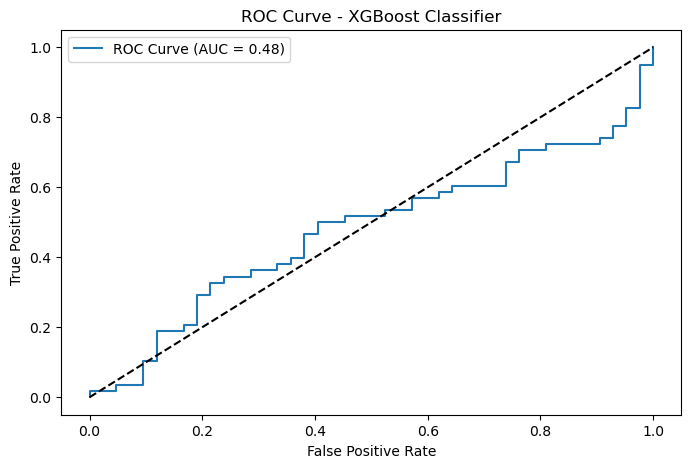

In [17]:
y_prob = xgb_model.predict_proba(X_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_prob)

plt.figure(figsize=(8,5))
plt.plot(fpr, tpr, label=f"ROC Curve (AUC = {roc_auc_score(y_test, y_prob):.2f})")
plt.plot([0,1], [0,1], 'k--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve - XGBoost Classifier")
plt.legend()
plt.show()